# <center>Кластеризация

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

**Задание 2.2**  
Вы узнали, что в соседнем районе построили пять студенческих общежитий, и решили, что будет отличной идеей открыть там пару ларьков с хот-догами. Изначальное положение общежитий и ваш план относительно ларьков выглядят следующим образом:

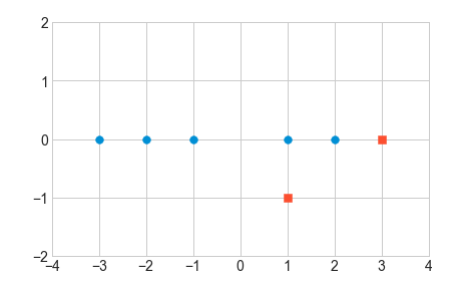

Здесь синие точки — общежития, красные — первоначальный план расположения ларьков.

Примените алгоритм k-means и найдите оптимальное расположение ларьков, чтобы расстояние до каждого из общежитий было минимальным (насколько это возможно, если ларьков всего два).

Известно, что у ларьков будут различные координаты по оси абсцисс.

Какой будет координата по оси абсцисс у ларька слева и справа? (необходимо найти центроиды)

In [3]:
shop = pd.DataFrame({
    'x': [-3, -2, -1, 1, 2],
    'y': [0, 0, 0, 0, 0]
})
km_model = KMeans(n_clusters=2).fit(shop)
shop['cluster'] = km_model.predict(shop)
display(shop)
print('Центроиды:')
print(km_model.cluster_centers_)

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,x,y,cluster
0,-3,0,0
1,-2,0,0
2,-1,0,0
3,1,0,1
4,2,0,1


Центроиды:
[[-2.   0. ]
 [ 1.5  0. ]]


# <center>K-means и EM: практика
Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

* gradyear — год выпуска;
* gender — пол;
* age — возраст;
* friends — число друзей в социальной сети;
* basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [4]:
data = pd.read_csv('data/snsdata.zip')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Задание 4.1**  
Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [5]:
drop_cols = ['gradyear', 'gender', 'age', 'friends']
data.drop(columns=drop_cols, inplace=True)
data.shape

(30000, 36)

**Задание 4.2**  
Теперь нормализуйте данные с помощью `StandardScaler()`.

In [6]:
data_scaled = StandardScaler().fit_transform(data)
data_scaled[0][0]

-0.3322172643985876

**Задание 4.3**  
Реализуйте алгоритм `k-means` c девятью кластерами. В качестве значения параметра `random_state` возьмите число `42`. Выведите получившееся значение инерции (`model.inertia_`).

In [9]:
km_model = KMeans(n_clusters=9, random_state=42).fit(data_scaled)
km_model.inertia_

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


856276.6962467819

**Задание 4.4**  
Сколько подростков относится к много- и малочисленному классу?

In [8]:
clusters = pd.Series(km_model.predict(data_scaled))
clusters.value_counts(ascending=False)

2    19998
7     4366
1     2552
0      969
8      863
6      768
3      482
5        1
4        1
dtype: int64

**Задание 4.5**  
Подберите оптимальное количество кластеров с помощью `inertia` и `silhouette`

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


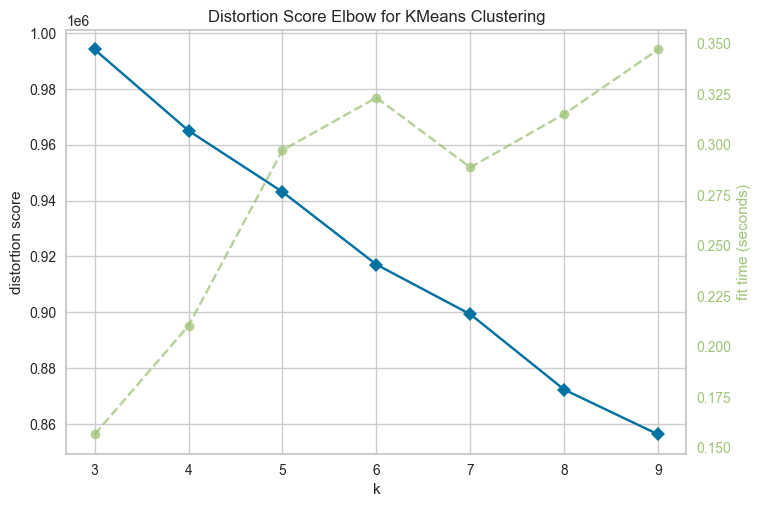

In [17]:
visualiser = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(3, 10)).fit(data_scaled)
visualiser.show();

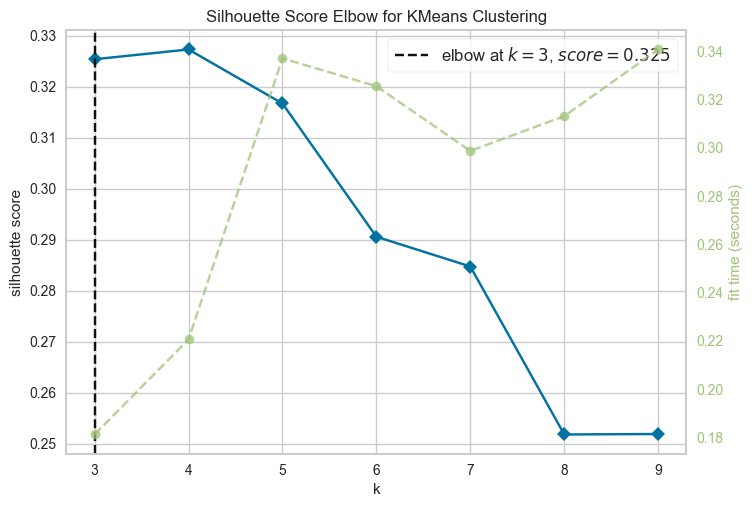

In [18]:
visualiser = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(3, 10), metric='silhouette').fit(data_scaled)
visualiser.show();

**Задание 4.6**  
Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

In [19]:
best_clustering = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled)
data['kmeans_cluster'] = best_clustering

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
grouped = data.groupby(by='kmeans_cluster')[data.columns.drop('kmeans_cluster')].mean().T
grouped.head()

kmeans_cluster,0,1,2
basketball,0.149095,0.668125,0.557811
football,0.149575,0.597274,0.521624
soccer,0.152585,0.470885,0.341571
softball,0.085191,0.431336,0.282436
volleyball,0.073239,0.400707,0.206531


In [41]:
top_list = []
for col in grouped.columns:
    top_10_set = set(grouped[col].sort_values(ascending=False).head(10).index)
    top_list.append(top_10_set)

set.intersection(*top_list)    

{'dance', 'god', 'hair', 'music'}

**Задание 4.7**  
Реализуйте EM-алгоритм (`GaussianMixture`) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра `random_state` возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [44]:
em_model = GaussianMixture(n_components=3, random_state=42).fit(data_scaled)
clusters_em = pd.Series(em_model.predict(data_scaled))
clusters_em.value_counts(ascending=False)

0    20670
2     6456
1     2874
dtype: int64

***
# <center>Агломеративная иерархическая кластеризация
**Задание 6.2**  
Найдите манхэттенское расстояние для точек

In [2]:
a = np.array([3, 6, 11, 8])
b = np.array([0, 9, 5, 3])
np.sum(np.abs(a - b))

17

**Задание 6.3**  
Найдите расстояние между кластерами $A$ с точками $(4, 0)$ и $(5, 1)$ и $B$ c точками $(-2, -3)$ и $(-3, -3)$, используя евклидово расстояние и метод средней связи. 

In [19]:
a = np.array([[4, 0], [5, 1]])
b = np.array([[-2, -3], [-3, -3]])
distances = np.array([])
for row_a in a:
    for row_b in b:
        distances = np.append(distances, np.sqrt(np.sum((row_a - row_b)**2)))
np.mean(distances)

7.832626674165247

***
Маркетологи хотят запустить рекламную кампанию, однако для этого необходимо произвести сегментацию клиентов, чтобы сделать акционное предложение более персонализированным. Мы попробуем использовать все известные нам методы кластеризации и посмотрим на получившиеся результаты.

* CUST_ID — идентификационный номер держателя карты;
* BALANCE — баланс, доступный для совершения покупок;
* BALANCEFREQUENCY — как часто обновляется показатель баланса (1 — часто, 0 — нечасто);
* PURCHASES — количество покупок, оплаченных со счёта;
* ONEOFFPURCHASES — максимальная сумма единовременной покупки;
* INSTALLMENTSPURCHASES — сумма покупок, сделанных в рассрочку;
* PURCHASESFREQUENCY — как часто в целом совершаются покупки (1 — часто, 0 — нечасто);
* ONEOFFPURCHASESFREQUENCY — частота совершения единовременных покупок (1 — часто, 0 — нечасто);
* PURCHASESINSTALLMENTSFREQUENCY — частота совершения покупок в рассрочку (1 — часто, 0 — нечасто);
* CASHADVANCEFREQUENCY — частота внесения авансовых платежей;
* CASHADVANCETRX — количество транзакций с авансовыми взносами;
* PURCHASESTRX — количество совершённых транзакций с покупками;
* CREDITLIMIT — кредитный лимит держателя карты;
* PAYMENTS — сумма платежей пользователя;
* MINIMUM_PAYMENTS — сумма минимального платежа пользователя;
* PRCFULLPAYMENT — выплаченный процент от полного платежа;
* TENURE — срок обслуживания кредитной карты.

In [8]:
data = pd.read_csv('data/CC_GENERAL.zip')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Пропуски в данных:

In [9]:
data.drop(columns='CUST_ID', inplace=True)
data.isna().sum().sum()

314

In [10]:
data.isna().sum()[data.isna().sum() > 0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Заполнение пропусков средним арифметическим:

In [11]:
data.fillna({
    'CREDIT_LIMIT': data['CREDIT_LIMIT'].mean(),
    'MINIMUM_PAYMENTS': data['MINIMUM_PAYMENTS'].mean()
}, inplace=True)

Нормализация данных с помощью `StandartScaler`:

In [12]:
data_scaled = StandardScaler().fit_transform(data)

Поиск оптимального количества кластеров:

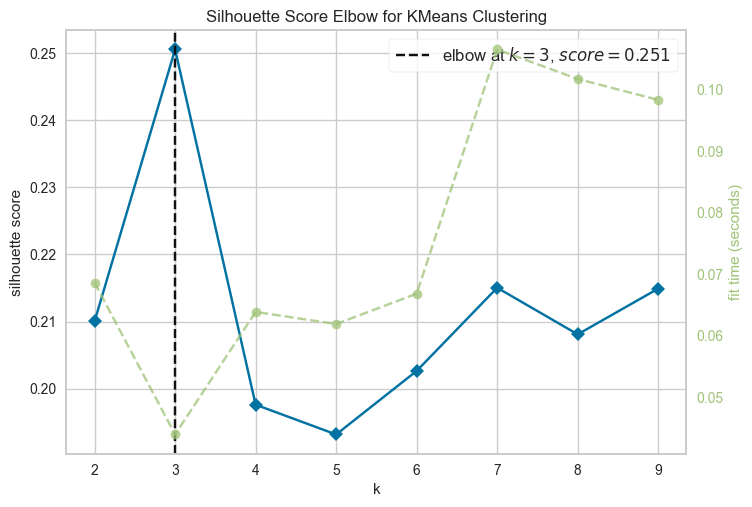

In [17]:
silhouette_plot = KElbowVisualizer(
    estimator=KMeans(random_state=42, n_init=10),
    k=(2, 10),
    metric='silhouette'
).fit(data_scaled)
silhouette_plot.show();

Кластеризация `KMeans`:

In [19]:
km_model = KMeans(n_clusters=3, random_state=42, n_init=10).fit(data_scaled)
kmeans_clusters = pd.Series(km_model.predict(data_scaled))
kmeans_clusters.value_counts(ascending=False)

2    6119
0    1596
1    1235
dtype: int64

Кластеризация `DBSCAN` по-умолчанию:

In [29]:
dbscan_clusters = pd.Series(DBSCAN().fit_predict(data_scaled))
print('Количество кластеров с DBSCAN по-умолчанию:', dbscan_clusters.nunique())

Количество кластеров с DBSCAN по-умолчанию: 39


Подбор параметров `DBSCAN`:

In [35]:
eps_list = np.arange(0.1,3,0.2)
min_samples_list = range(1,20,4)
silhouette_dict = {
    'score': [],
    'eps': [],
    'min_samples': []
}
for eps in eps_list:
    for min_samples in min_samples_list:
        silhouette = silhouette_score(
            data_scaled,
            DBSCAN(
                eps=eps,
                min_samples=min_samples,
                n_jobs=-1
            ).fit_predict(data_scaled)
        )
        silhouette_dict['score'].append(silhouette)
        silhouette_dict['eps'].append(eps)
        silhouette_dict['min_samples'].append(min_samples)
        
argmax = np.argmax(silhouette_dict['score'])
max_silhouette = np.round(max(silhouette_dict['score']), 2)
best_eps = np.round(silhouette_dict['eps'][argmax], 2)
best_min_samples = silhouette_dict['min_samples'][argmax]
n_clusters = pd.Series(DBSCAN(eps=best_eps, min_samples=best_min_samples).fit_predict(data_scaled)).nunique()
print(
    f'Max silhouette: {max_silhouette}',
    f'\nBest eps: {best_eps}',
    f'\nBest min_samples: {best_min_samples}',
    f'\nNumber of clusters: {n_clusters}'
)

Max silhouette: 0.62 
Best eps: 2.9 
Best min_samples: 5 
Number of clusters: 2


Подбор параметров `AgglomerativeClustering`:

In [40]:
n_clusters_list = range(3, 10)
silhouette_dict = {
    'score': [],
    'n_clusters': []
}
for n_clusters in n_clusters_list:
    silhouette = silhouette_score(data_scaled, AgglomerativeClustering(n_clusters=n_clusters).fit_predict(data_scaled))
    silhouette_dict['n_clusters'].append(n_clusters)
    silhouette_dict['score'].append(silhouette)

argmax = np.argmax(silhouette_dict['score'])
best_n_clusters = silhouette_dict['n_clusters'][argmax]
best_score = np.max(silhouette_dict['score'])
print(
    f'Max silhouette: {best_score}',
    f'\nBest n_clusters: {best_n_clusters}'
)

Max silhouette: 0.17335577924064002 
Best n_clusters: 6


`AgglomerativeClustering` с оптимальным количеством кластеров:

In [41]:
agg_clusters = pd.Series(AgglomerativeClustering(n_clusters=best_n_clusters).fit_predict(data_scaled))
agg_clusters.value_counts()

0    3946
1    2931
2     864
5     722
3     464
4      23
dtype: int64

Визуализация кластеризации `KMeans`, отобразив два признака — количество покупок и кредитный лимит:

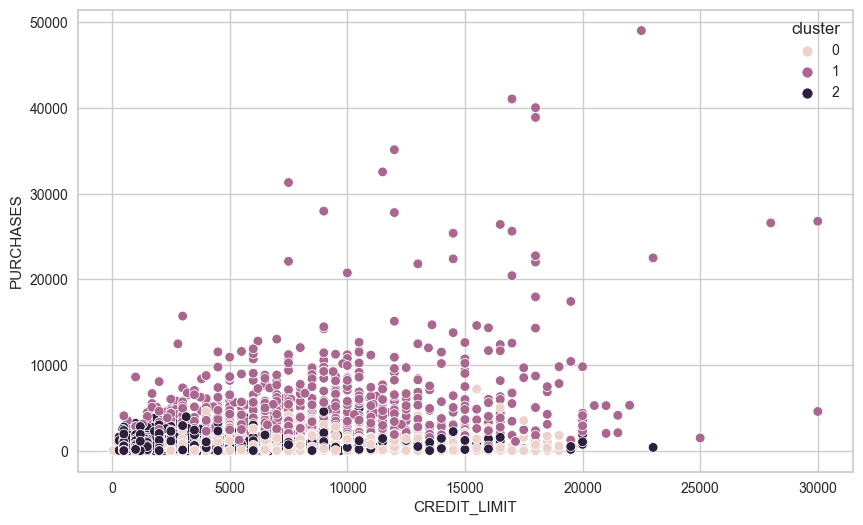

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(data_scaled)
data['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show();